In [1]:
import joblib
import pandas as pd
import numpy as np 
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
sample = pd.read_pickle('training_sample.pkl')

In [3]:
sample.head()

,run,event,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,event_weight,is_forward,is_leading,pt_idx,target,flatpt_weight
38784,364704.0,128244426.0,756.918274,-0.267729,13.0,0.016890,0.158292,-0.212644,2.0,0.400877,1.0,1.0,1,0.0,0.000016
76944,364705.0,33428078.0,979.209412,-0.177722,29.0,0.035617,0.227922,0.263193,21.0,0.420153,0.0,1.0,2,1.0,0.000097
184802,364704.0,134794190.0,521.805176,0.770232,15.0,0.025237,0.203193,-0.059303,4.0,1.047949,1.0,1.0,0,0.0,0.000010
286675,364704.0,138678461.0,512.864563,-1.864337,14.0,0.035285,0.196587,-0.053137,21.0,0.459634,1.0,0.0,0,1.0,0.000004
99196,364704.0,123346880.0,701.029419,-0.035616,12.0,0.012978,0.156514,-0.290759,2.0,0.411335,0.0,1.0,1,0.0,0.000011


In [4]:
len(sample)

61740596

In [12]:
import atlas_mpl_style as ampl
ampl.use_atlas_style(usetex=False)

HistBins = {
    'jet_pt' : np.linspace(500, 2000, 61),
    'jet_eta' : np.linspace(-2.5, 2.5, 51), 
    'jet_nTracks' : np.linspace(0, 60, 61),
    'jet_trackWidth' : np.linspace(0, 0.4, 61),
    'jet_trackC1' : np.linspace(0, 0.4, 61),
    'jet_trackBDT' : np.linspace(-1.0, 1.0, 101),
    'GBDT_newScore' : np.linspace(-5.0, 5.0, 101),
}

Map_var_title = {
    "jet_pt": "$p_{T}$",
    "jet_nTracks": "$N_{trk}$",
    "jet_trackBDT": "old BDT",
    "jet_eta": "$\eta$",
    "jet_trackC1": "$C_{1}$",
    "jet_trackWidth": "W",
    "GBDT_newScore": "new BDT"
}



# pt spectrum

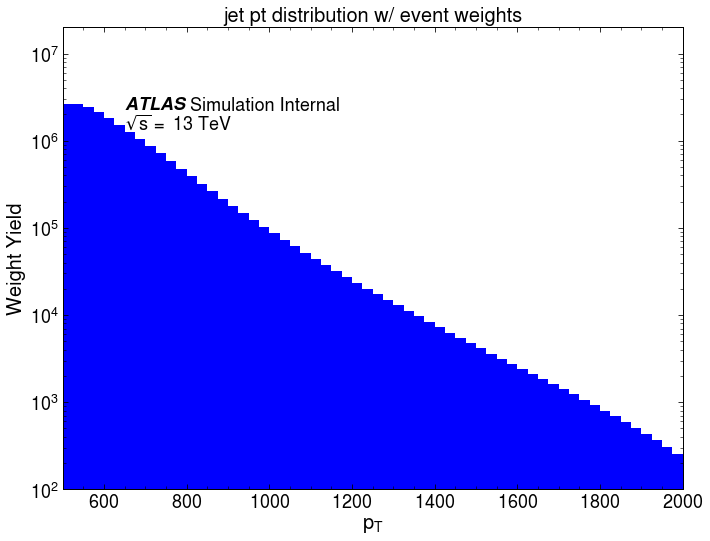

In [19]:
fig, ax = plt.subplots()
ax.hist(sample['jet_pt'], bins=HistBins['jet_pt'], weights=sample['event_weight'], color='blue')
ax.set_yscale('log')

ax.set_xlim(HistBins['jet_pt'][0], HistBins['jet_pt'][-1])
ax.set_ylim(1e2, 0.2 * 1e8)
ax.set_title('jet pt distribution w/ event weights') 
ax.set_xlabel(Map_var_title['jet_pt'])
ax.set_ylabel('Weight Yield')
ampl.draw_atlas_label(0.1, 0.85, ax=ax, energy="13 TeV", simulation=True)

fig.savefig('./plots/pt_event_weight')

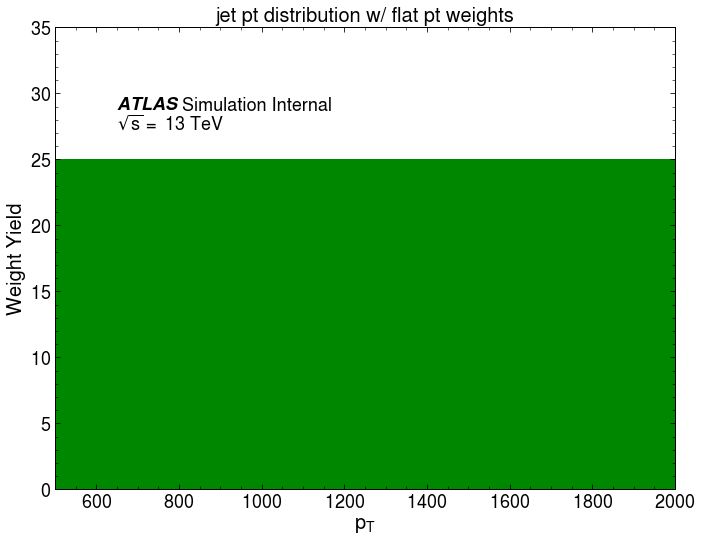

In [23]:
fig, ax = plt.subplots()
ax.hist(sample['jet_pt'], bins=HistBins['jet_pt'], weights=sample['flatpt_weight'])


ax.set_xlim(HistBins['jet_pt'][0], HistBins['jet_pt'][-1])
ax.set_ylim(0, 35)
ax.set_title('jet pt distribution w/ flat pt weights') 
ax.set_xlabel(Map_var_title['jet_pt'])
ax.set_ylabel('Weight Yield')
ampl.draw_atlas_label(0.1, 0.85, ax=ax, energy="13 TeV", simulation=True)

In [25]:
fig.savefig('./plots/pt_flatpt_weight')

# Confusion matrix 

In [26]:
sample_abseta = sample.copy()
sample_abseta['jet_eta'] = np.abs(sample_abseta['jet_eta'])

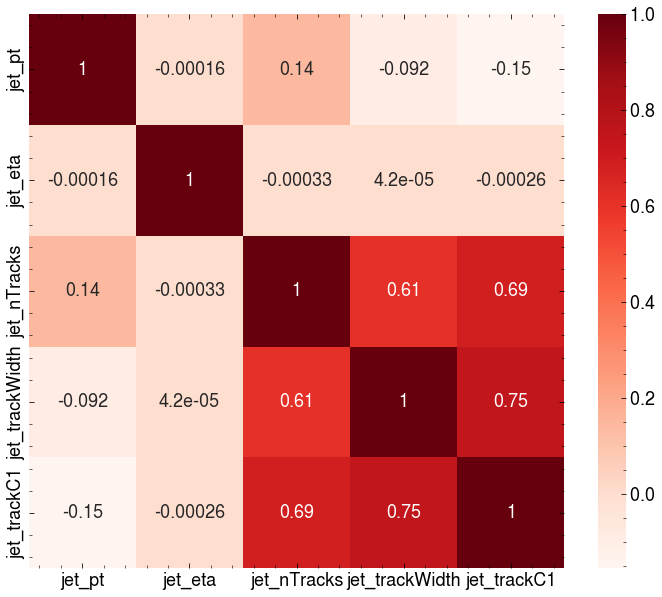

In [34]:
import seaborn as sns
#Using Pearson Correlation
training_vars = ['jet_pt', 'jet_eta', 'jet_nTracks', 'jet_trackWidth', 'jet_trackC1']

plt.figure(figsize=(12,10))
cor = sample[training_vars].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig("./plots/corr")
plt.show()

In [41]:
cor

,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1
jet_pt,1.000000,-0.000162,0.139612,-0.092495,-0.154501
jet_eta,-0.000162,1.000000,-0.000328,0.000042,-0.000255
jet_nTracks,0.139612,-0.000328,1.000000,0.610674,0.688057
jet_trackWidth,-0.092495,0.000042,0.610674,1.000000,0.748119
jet_trackC1,-0.154501,-0.000255,0.688057,0.748119,1.000000


In [38]:
from WeightedCorr import WeightedCorr

In [40]:
weight_corr = WeightedCorr(df=sample[training_vars + ['event_weight']], wcol='event_weight')(method='pearson')

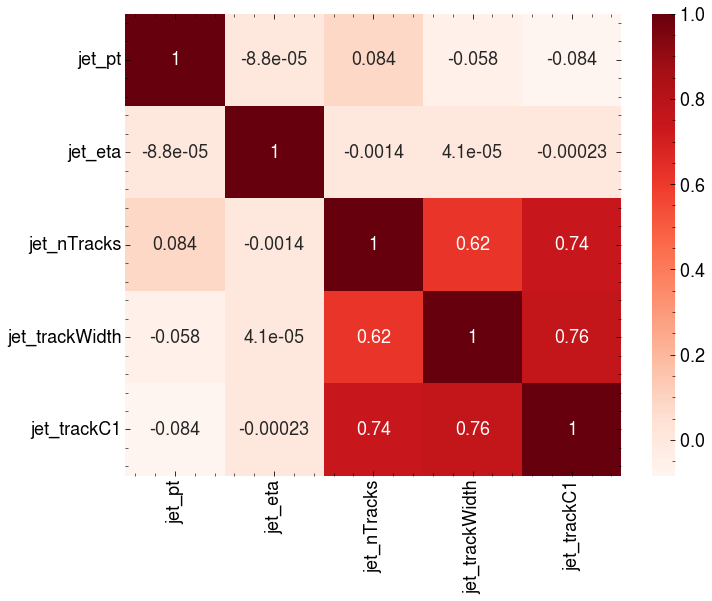

In [42]:
plt.figure()
sns.heatmap(weight_corr, annot=True, cmap=plt.cm.Reds)
plt.savefig("./plots/weighted_corr")
plt.show()